In [7]:
%matplotlib widget
import numpy as np
from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt
import ccdproc as ccdp
from astropy.utils.data import get_pkg_data_filename
import astropy
from astropy.stats import mad_std
import pandas as pd
from astropy.io import fits

In [2]:
bias1= astropy.io.fits.open('BIAS_B11-001.fit')
bias2= astropy.io.fits.open('BIAS_B11-002.fit')
bias3= astropy.io.fits.open('BIAS_B11-003.fit')
bias4= astropy.io.fits.open('BIAS_B11-004.fit')
bias5= astropy.io.fits.open('BIAS_B11-005.fit')
bias6= astropy.io.fits.open('BIAS_B11-006.fit')
bias7= astropy.io.fits.open('BIAS_B11-007.fit')
bias8= astropy.io.fits.open('BIAS_B11-008.fit')
bias9= astropy.io.fits.open('BIAS_B11-009.fit')

dark1= astropy.io.fits.open('DARK_60sec_B11-001.fit')
dark2= astropy.io.fits.open('DARK_60sec_B11-002.fit')
dark3= astropy.io.fits.open('DARK_60sec_B11-003.fit')
dark4= astropy.io.fits.open('DARK_60sec_B11-004.fit')
dark5= astropy.io.fits.open('DARK_60sec_B11-005.fit')
dark6= astropy.io.fits.open('DARK_60sec_B11-006.fit')
dark7= astropy.io.fits.open('DARK_60sec_B11-007.fit')
dark8= astropy.io.fits.open('DARK_60sec_B11-008.fit')
dark9= astropy.io.fits.open('DARK_60sec_B11-009.fit')

flatB1= astropy.io.fits.open('FLAT_B_B11-001.fit')
flatB2= astropy.io.fits.open('FLAT_B_B11-002.fit')
flatB3= astropy.io.fits.open('FLAT_B_B11-003.fit')
flatB4= astropy.io.fits.open('FLAT_B_B11-004.fit')
flatB5= astropy.io.fits.open('FLAT_B_B11-005.fit')
flatB6= astropy.io.fits.open('FLAT_B_B11-006.fit')
flatB7= astropy.io.fits.open('FLAT_B_B11-007.fit')
flatB8= astropy.io.fits.open('FLAT_B_B11-008.fit')
flatB9= astropy.io.fits.open('FLAT_B_B11-009.fit')
flatB10= astropy.io.fits.open('FLAT_B_B11-010.fit')

flat_sloani1 =astropy.io.fits.open('FLAT_sloan_i_B11-001.fit')
flat_sloani2 =astropy.io.fits.open('FLAT_sloan_i_B11-002.fit')
flat_sloani3 =astropy.io.fits.open('FLAT_sloan_i_B11-003.fit')
flat_sloani4 =astropy.io.fits.open('FLAT_sloan_i_B11-004.fit')
flat_sloani5 =astropy.io.fits.open('FLAT_sloan_i_B11-005.fit')
flat_sloani6 =astropy.io.fits.open('FLAT_sloan_i_B11-006.fit')
flat_sloani7 =astropy.io.fits.open('FLAT_sloan_i_B11-007.fit')

In [8]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data,\
bias4[0].data,bias5[0].data,bias6[0].data,bias7[0].data,bias8[0].data,bias9[0].data]), axis=0)

In [9]:
darklist= np.array([dark1[0].data, dark2[0].data, dark3[0].data, dark4[0].data,\
dark5[0].data, dark6[0].data, dark7[0].data, dark8[0].data, dark9[0].data]) - master_bias

In [10]:
master_dark = np.median(darklist, axis = 0) / 60
np.min(master_dark)

-4.961111111111112

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
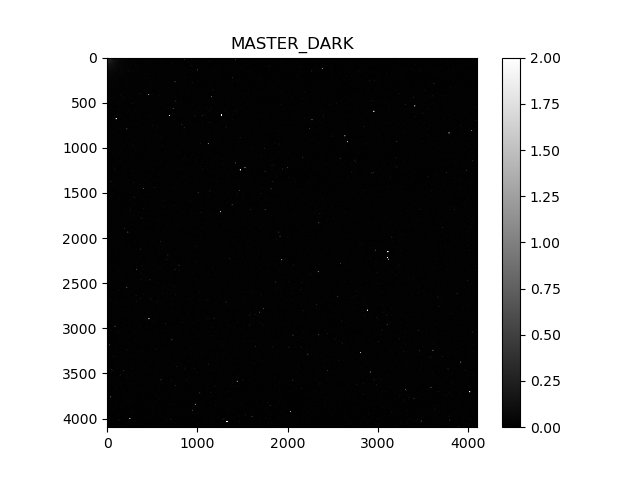

In [6]:
plt.imshow(master_dark, cmap='gray', vmin=0, vmax=2)
plt.title('MASTER_DARK')
plt.colorbar()
plt.savefig('MASTER_DARK.jpg')

In [11]:
flat_sloanilist= np.mean(np.array([flat_sloani1[0].data, flat_sloani2[0].data, flat_sloani3[0].data, flat_sloani4[0].data, flat_sloani5[0].data, 
                             flat_sloani6[0].data, flat_sloani7[0].data]), axis=0)
flat_sloanilist

array([[5069.14285714, 5163.71428571, 5154.85714286, ..., 4983.71428571,
        4942.85714286, 4914.        ],
       [5197.57142857, 5299.42857143, 5306.        , ..., 5080.14285714,
        5091.71428571, 5012.57142857],
       [5304.57142857, 5285.71428571, 5332.14285714, ..., 5085.        ,
        5091.71428571, 5070.28571429],
       ...,
       [5073.57142857, 5122.85714286, 5207.85714286, ..., 5461.42857143,
        5410.71428571, 5382.71428571],
       [5023.14285714, 5121.        , 5106.57142857, ..., 5400.42857143,
        5411.42857143, 5367.14285714],
       [5023.42857143, 5081.28571429, 5115.28571429, ..., 5412.71428571,
        5340.85714286, 5326.28571429]])

In [13]:
darkybias= master_dark + master_bias
darkybias

array([[1022.66851852, 1018.69259259, 1017.32407407, ..., 1015.20185185,
        1012.47037037, 1013.94814815],
       [1021.21481481, 1018.62592593, 1018.55925926, ..., 1008.48703704,
        1017.16851852, 1019.56296296],
       [1024.45925926, 1019.47592593, 1018.50925926, ..., 1010.97407407,
        1013.25185185, 1018.61296296],
       ...,
       [1025.04259259, 1023.16851852, 1014.5962963 , ..., 1009.39444444,
        1017.68148148, 1017.70555556],
       [1020.73888889, 1018.87407407, 1016.24259259, ..., 1012.86481481,
        1013.12592593, 1019.37777778],
       [1019.20925926, 1018.36111111, 1018.58888889, ..., 1013.5037037 ,
        1013.15925926, 1022.02592593]])

In [14]:
master_flat_sloani = flat_sloanilist - darkybias

In [10]:
flatBlist= np.mean(np.array([flatB1[0].data, flatB2[0].data, flatB3[0].data, flatB4[0].data, flatB5[0].data,\
flatB6[0].data, flatB7[0].data, flatB8[0].data, flatB9[0].data, flatB10[0].data]), axis=0)
flatBlist

array([[7587.3, 7768.7, 7765.8, ..., 7655.3, 7584.3, 7414.8],
       [7849.6, 8043.5, 8045.8, ..., 7876.4, 7915.9, 7671.1],
       [8019.3, 8184.7, 8202.2, ..., 7982.7, 7903.6, 7767.1],
       ...,
       [8928.1, 9141.4, 9200.3, ..., 9544.8, 9407.9, 9240.1],
       [8822.8, 9060.6, 9001.7, ..., 9478.9, 9436. , 9194.9],
       [8750.2, 8972.6, 9056.2, ..., 9335.5, 9270. , 9124. ]])

In [11]:
master_flat_B = flatBlist - darkybias
master_flat_B

array([[6564.63148148, 6750.00740741, 6748.47592593, ..., 6640.09814815,
        6571.82962963, 6400.85185185],
       [6828.38518519, 7024.87407407, 7027.24074074, ..., 6867.91296296,
        6898.73148148, 6651.53703704],
       [6994.84074074, 7165.22407407, 7183.69074074, ..., 6971.72592593,
        6890.34814815, 6748.48703704],
       ...,
       [7903.05740741, 8118.23148148, 8185.7037037 , ..., 8535.40555556,
        8390.21851852, 8222.39444444],
       [7802.06111111, 8041.72592593, 7985.45740741, ..., 8466.03518519,
        8422.87407407, 8175.52222222],
       [7730.99074074, 7954.23888889, 8037.61111111, ..., 8321.9962963 ,
        8256.84074074, 8101.97407407]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
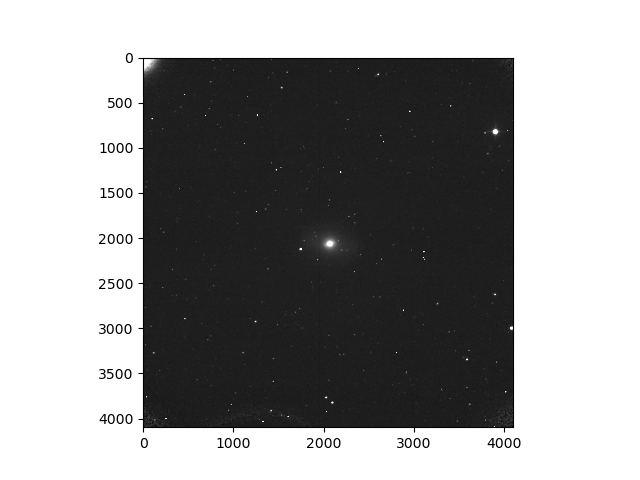

In [15]:
B1= astropy.io.fits.open('Light00000013.fit')
B1redux= (B1[0].data - darkybias)/ master_flat_sloani
plt.imshow(B1redux, cmap='gray', vmin= 0, vmax=np.mean(B1redux)+np.std(B1redux))
plt.show()

In [26]:
B1redux= (B1[0].data - darkybias) / master_flat_B
B1redux

array([[ 5.22976523e-03,  3.00850150e-03,  3.50833672e-03, ...,
         1.32500273e-03,  3.84920147e-04,  2.19530965e-03],
       [ 6.99802133e-03,  4.89319434e-03,  4.47412319e-03, ...,
         1.23952691e-03, -1.18406095e-03,  2.32082253e-03],
       [ 2.65063086e-03,  4.67871957e-03,  4.80125634e-03, ...,
        -1.71751933e-03,  9.79362436e-04,  5.73516753e-05],
       ...,
       [ 1.76607694e-03, -1.00619433e-03,  4.93181427e-05, ...,
         3.05264412e-04,  6.33895113e-04,  2.71142969e-03],
       [-2.22875579e-04,  2.64361898e-04,  2.20075985e-04, ...,
         1.31527745e-03, -1.43964231e-03, -1.75863723e-03],
       [ 1.13707816e-03, -6.73994229e-04,  5.48808726e-04, ...,
        -3.00853739e-04,  2.16072240e-03,  1.35449385e-03]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
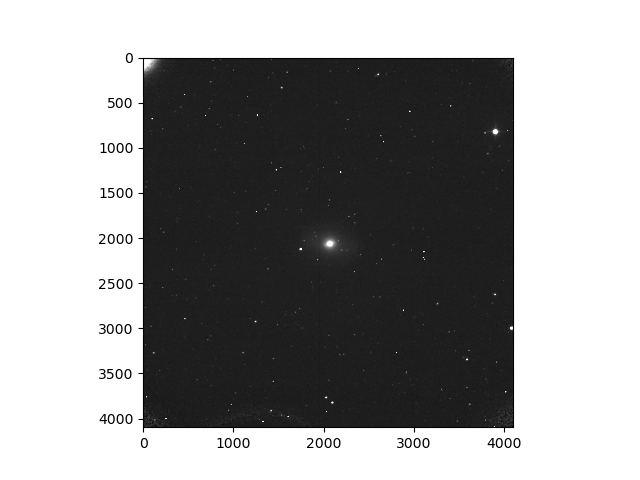

In [17]:
B1= astropy.io.fits.open('Light00000013.fit')
B1redux= (B1[0].data - darkybias)/ master_flat_sloani
plt.imshow(B1redux, cmap='gray', vmin= 0, vmax=np.mean(B1redux)+np.std(B1redux))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
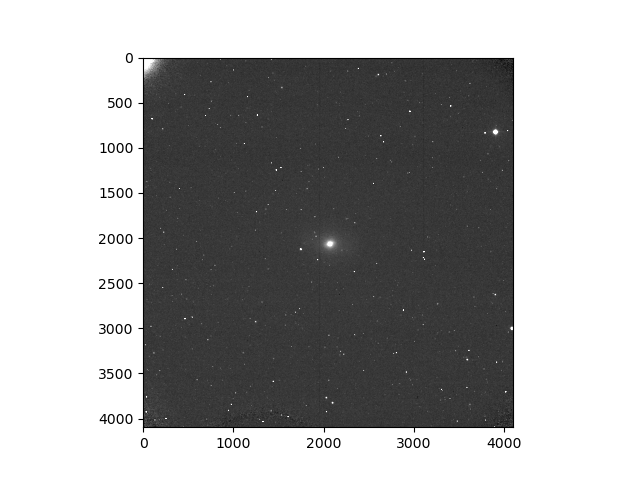

In [19]:
B1= astropy.io.fits.open('Light00000006.fit')
B1redux= (B1[0].data - darkybias)/ master_flat_B
plt.imshow(B1redux, cmap='gray', vmin= 0, vmax=np.mean(B1redux)+np.std(B1redux))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
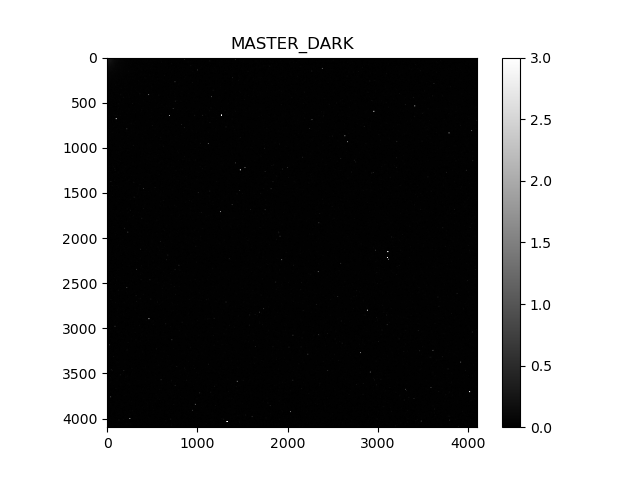

In [11]:
plt.imshow(master_dark, cmap='gray', vmin = 0, vmax=3)
plt.title('MASTER_DARK')
plt.colorbar()

In [5]:
np.max(master_dark)

NameError: name 'master_dark' is not defined

In [ ]:
dark1= astropy.io.fits.open('DARK_60sec_B11-001.fit')
dark2= astropy.io.fits.open('DARK_60sec_B11-002.fit')
dark3= astropy.io.fits.open('DARK_60sec_B11-003.fit')
dark4= astropy.io.fits.open('DARK_60sec_B11-004.fit')
dark5= astropy.io.fits.open('DARK_60sec_B11-005.fit')
dark6= astropy.io.fits.open('DARK_60sec_B11-006.fit')
dark7= astropy.io.fits.open('DARK_60sec_B11-007.fit')
dark8= astropy.io.fits.open('DARK_60sec_B11-008.fit')
dark9= astropy.io.fits.open('DARK_60sec_B11-009.fit')